In [21]:
import jalali
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
#import statsmodels as sm
from statsmodels.tsa.arima_model import ARMA

pd.options.mode.chained_assignment = None 

df = pd.read_csv('Data//Daily.csv', names = ['persian_date','value'], header=None)
df['date'] = df.apply(lambda row: jalali.Persian(row['persian_date']).gregorian_string("{}/{}/{}"), axis=1)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2436 entries, 2011-11-22 to 2018-07-23
Data columns (total 2 columns):
persian_date    2436 non-null object
value           2436 non-null float64
dtypes: float64(1), object(1)
memory usage: 57.1+ KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


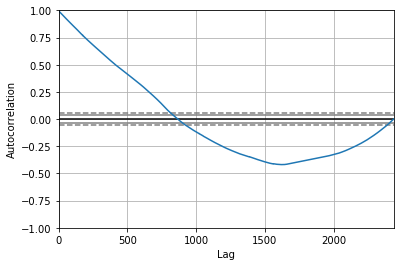

In [2]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df['value'])
plt.show()

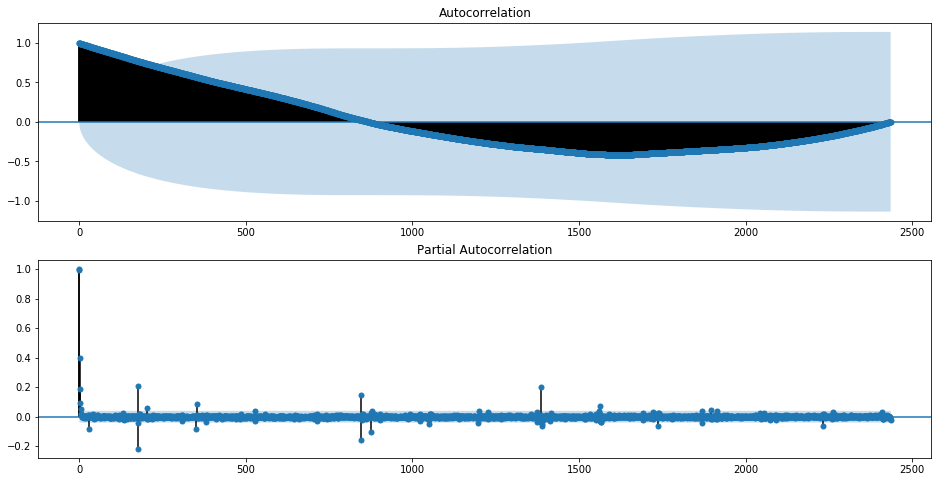

In [52]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

plt.figure(figsize=(16,8))
plt.title('ACF and PACF')

pyplot.subplot(211)
plot_acf(df['value'], ax = pyplot.gca())
pyplot.subplot(212)
plot_pacf(df['value'], ax = pyplot.gca())
pyplot.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


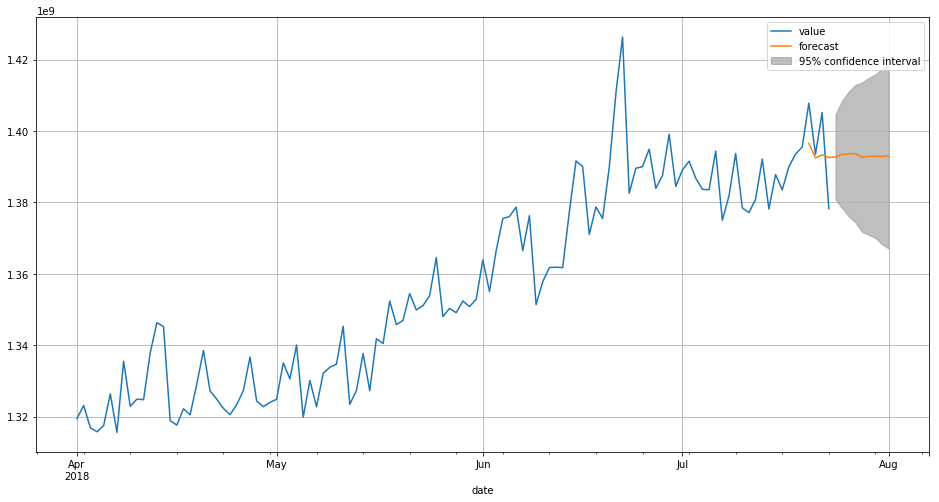

In [56]:
res = sm.tsa.ARMA(df['value'][365 * 3:], (10, 0)).fit()

plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(16,8))
ax = df.loc['2018-04-01':].plot(ax=ax)
fig = res.plot_predict('2018-07-20', '2018-08-01', dynamic=True, ax=ax, plot_insample=False)
plt.grid(True)
plt.show()

In [ ]:
res = sm.tsa.ARMA(df['value'][365 * 3:], (20, 0)).fit()

plt.figure(figsize=(16,8))
fig, ax = plt.subplots(figsize=(16,8))
ax = df.loc['2018-04-01':].plot(ax=ax)
fig = res.plot_predict('2018-07-20', '2018-08-01', dynamic=True, ax=ax, plot_insample=False)
plt.grid(True)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
